In [107]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer(ngram_range=(2,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [111]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [112]:
import spacy

nlp = spacy.load('en_core_web_sm')
def PreProcess(text):
    doc = nlp(text)
    filter_token=list()
    for token in doc:
        if token.is_stop or token.is_punct or token.is_space:
            continue
        filter_token.append(token.lemma_)
    return ' '.join(filter_token)

PreProcess('Loki is eating pizza')

'Loki eat pizza'

In [113]:
corpus_preprocessed = [PreProcess(i) for i in corpus]
corpus_preprocessed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [114]:
v = CountVectorizer(ngram_range=(1,2))
v.fit_transform(corpus_preprocessed)
v.vocabulary_
# v.fit_transform(corpus_preprocessed).toarray()

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [115]:
v.transform(corpus_preprocessed).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [116]:
import pandas as pd
df = pd.read_json('./news_dataset.json')
df.head(20)
# df['text'][2]

"Entrepreneurs Today Don't Need a Big Budget to Start It wasn't so many years ago that starting a new e-commerce business on the Internet was a complex custom development project, usually costing a million dollars or more. Now you can do it for free."

In [117]:
df['category'].value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [118]:
min_sample = 1381

df_busi = df[df.category=="BUSINESS"].sample(min_sample,random_state=42)
df_sport = df[df.category=="SPORTS"].sample(min_sample,random_state=42)
df_crime = df[df.category=="CRIME"].sample(min_sample,random_state=42)
df_science = df[df.category=="SCIENCE"].sample(min_sample,random_state=42)

# df_final = pd.concat([df_busi,df_sport,df_crime,df_science],axis=1)
# df_final.head()

In [119]:
df_final = pd.concat([df_busi,df_sport,df_crime,df_science],axis=0)
df_final.head()

,text,category
594,How to Develop the Next Generation of Innovato...,BUSINESS
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS


In [120]:
df_final['category'].value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [121]:
df_final['category_num']=df_final['category'].map({
    "BUSINESS" :0,
"SPORTS":1,
"CRIME":2,
"SCIENCE":3,
})
df_final.head()

,text,category,category_num
594,How to Develop the Next Generation of Innovato...,BUSINESS,0
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS,0
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS,0
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS,0
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS,0


In [122]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_final['text'],df_final['category_num'],random_state=42,test_size=.2,stratify=df_final['category_num'])

In [123]:
y_train.value_counts()

category_num
0    1105
3    1105
1    1105
2    1104
Name: count, dtype: int64

In [124]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,2))),
    ('mnb',MultinomialNB()),
])

clf.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 2))),
                ('mnb', MultinomialNB())])

In [125]:
print(f'accuracy without preprocessing {clf.score(x_test,y_test)*100} %')

accuracy without preprocessing 85.88235294117646 %


In [126]:
clf.predict(['Chinese companies’ stock market listings once flooded Wall Street. These days, China’s initial public offerings are in a drought.',
             





             
'''A sequence of letters belonging to an ancient alphabet has been discovered in a most unusual way — by someone scrolling through social media.

The inscription, on a slate slab unearthed in Spain, is closely linked to the Phoenician alphabet, which was hugely influential on later writing systems including Latin, Spanish and English. Researchers hope that the finding will expand their understanding of a prosperous pre-Roman civilization’s writing system. Until now, only incomplete or poorly dated samples had been found. The Spanish National Research Council announced the discovery in a June 11 press release.

The best of Science News - direct to your inbox
Headlines and summaries of the latest Science News articles, delivered to your email inbox every Thursday.
Email
Your email address
CONTINUE
Earlier this month, Joan Ferrer i Jané, a software engineer based in Barcelona, was browsing updates on X, formerly Twitter, from an archaeological dig at Casas del Turuñuelo in southern Spain. Dating to the 5th century B.C., the site is one of several connected with Tartessos. This civilization emerged in what is today southwestern Spain from the cultural exchange between the Iberian peninsula’s indigenous dwellers and Phoenician settlers who arrived around the 10th century B.C. (SN: 3/16/22). Ancient Greek texts mention the existence of a city called Tartessos, which recent findings are revealing was in fact a complex culture with stunning material wealth due to abundant iron, silver and gold in the region. This civilization mysteriously disappeared towards the end of the 5th century B.C. 

El Turuñuelo, first excavated in 2015, features a large temple that experts suggest was deliberately burned down and buried as part of a ceremonial ritual. The clay used for burial, archaeologists say, sealed the site, preserving its contents.''',







'''
The mutilated body of a 13-year-old girl, who was allegedly tortured and killed, was found in a sugarcane field at a village in Uttar Pradesh’s Lakhimpur Kheri district.

According to sources, the girl went missing while returning from school. Her parents informed the police that she did not return till late at night, but the police did not register their complaint then.

ADVERTISEMENT
They said the next morning villagers found the mutilated body of the girl and informed police, adding that the girl’s eyes were scooped out.

/
MUST READ
Where is Melania Trump? Her absence amid husband's campaign sparks curiousity

TRENDING TOPICS:
Elections 2024
Pune Porsche Crash
Cyclone Remal
KKR
Swati Maliwal 'Assault'
Police then reached the spot, recovered the body, sent it for a postmortem examination, and registered a complaint.

Lakhimpur Kheri Superintendent of Police (SP) Ganesh Prasad Saha reached the post, investigated the area, and formed three investigation teams.

The victim’s mother claimed that police inaction led to her death. She said that had the police registered her complaint on time, they could have saved the girl, who was missing for two days.

The SP said, “Prima facie, it looks like the girl was beaten to death as a lot of injury marks are visible, but we will figure out the facts after the post-mortem examination. We have engaged surveillance teams and teams from the nearby police stations. We are making all efforts to uncover the truth and people are also being questioned.”
'''])

array([0, 3, 2], dtype=int64)

"BUSINESS" :0,
"SPORTS":1,
"CRIME":2,
"SCIENCE":3,

In [127]:
df_final['preprocessed_text']=df_final['text'].apply(PreProcess)

In [128]:
df_final.head()

,text,category,category_num,preprocessed_text
594,How to Develop the Next Generation of Innovato...,BUSINESS,0,develop Generation Innovators stop treat way g...
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS,0,Madoff Victims Payout near $ 7.2 billion Trust...
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS,0,Bay Area Floats Sanctuary Transit Policy prote...
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS,0,Microsoft agree acquire linkedin $ 26.2 billio...
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS,0,inside Legal Multibillion Dollar Weed Market


In [129]:
x_train,x_test,y_train,y_test=train_test_split(df_final['preprocessed_text'],df_final['category_num'],random_state=42,test_size=.2,stratify=df_final['category_num'])
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,2))),
    ('mnb',MultinomialNB()),
])

clf.fit(x_train,y_train)
clf.score(x_test,y_test)
print(f'accuracy with preprocessing {clf.score(x_test,y_test)*100} %')

accuracy with preprocessing 88.68778280542986 %


In [130]:
clf.predict(['Chinese companies’ stock market listings once flooded Wall Street. These days, China’s initial public offerings are in a drought.',
             





             
'''A sequence of letters belonging to an ancient alphabet has been discovered in a most unusual way — by someone scrolling through social media.

The inscription, on a slate slab unearthed in Spain, is closely linked to the Phoenician alphabet, which was hugely influential on later writing systems including Latin, Spanish and English. Researchers hope that the finding will expand their understanding of a prosperous pre-Roman civilization’s writing system. Until now, only incomplete or poorly dated samples had been found. The Spanish National Research Council announced the discovery in a June 11 press release.

The best of Science News - direct to your inbox
Headlines and summaries of the latest Science News articles, delivered to your email inbox every Thursday.
Email
Your email address
CONTINUE
Earlier this month, Joan Ferrer i Jané, a software engineer based in Barcelona, was browsing updates on X, formerly Twitter, from an archaeological dig at Casas del Turuñuelo in southern Spain. Dating to the 5th century B.C., the site is one of several connected with Tartessos. This civilization emerged in what is today southwestern Spain from the cultural exchange between the Iberian peninsula’s indigenous dwellers and Phoenician settlers who arrived around the 10th century B.C. (SN: 3/16/22). Ancient Greek texts mention the existence of a city called Tartessos, which recent findings are revealing was in fact a complex culture with stunning material wealth due to abundant iron, silver and gold in the region. This civilization mysteriously disappeared towards the end of the 5th century B.C. 

El Turuñuelo, first excavated in 2015, features a large temple that experts suggest was deliberately burned down and buried as part of a ceremonial ritual. The clay used for burial, archaeologists say, sealed the site, preserving its contents.''',







'''
The mutilated body of a 13-year-old girl, who was allegedly tortured and killed, was found in a sugarcane field at a village in Uttar Pradesh’s Lakhimpur Kheri district.

According to sources, the girl went missing while returning from school. Her parents informed the police that she did not return till late at night, but the police did not register their complaint then.

ADVERTISEMENT
They said the next morning villagers found the mutilated body of the girl and informed police, adding that the girl’s eyes were scooped out.

/
MUST READ
Where is Melania Trump? Her absence amid husband's campaign sparks curiousity

TRENDING TOPICS:
Elections 2024
Pune Porsche Crash
Cyclone Remal
KKR
Swati Maliwal 'Assault'
Police then reached the spot, recovered the body, sent it for a postmortem examination, and registered a complaint.

Lakhimpur Kheri Superintendent of Police (SP) Ganesh Prasad Saha reached the post, investigated the area, and formed three investigation teams.

The victim’s mother claimed that police inaction led to her death. She said that had the police registered her complaint on time, they could have saved the girl, who was missing for two days.

The SP said, “Prima facie, it looks like the girl was beaten to death as a lot of injury marks are visible, but we will figure out the facts after the post-mortem examination. We have engaged surveillance teams and teams from the nearby police stations. We are making all efforts to uncover the truth and people are also being questioned.”
'''])

array([0, 3, 2], dtype=int64)

# Exercise😁👇👇

In [131]:
import pandas as pd
df=pd.read_csv('./Fake_Real_Data.csv')
df.shape

(9900, 2)

In [132]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [133]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [134]:
df_label=df[df['label']=='Fake'].sample(4900,random_state=42)
df_real=df[df['label']=='Real'].sample(4900,random_state=42)

In [135]:
df_final = pd.concat([df_label,df_real],axis=0)
df_final.head()

,Text,label
3030,‘Losers’: Kellyanne Conway Responds To Clinto...,Fake
5122,Trump Supporter Caught In Racist Meltdown Whi...,Fake
5256,Trump Team Getting Approval On White National...,Fake
2121,WATCH: Violent Trump Fan Shoves Peaceful Prot...,Fake
1425,Trump BANS Campaign Volunteers From Talking A...,Fake


In [136]:
df_final['label_num']=df_final['label'].apply(lambda x:1 if x=='Real' else 0)
df_final.head()

,Text,label,label_num
3030,‘Losers’: Kellyanne Conway Responds To Clinto...,Fake,0
5122,Trump Supporter Caught In Racist Meltdown Whi...,Fake,0
5256,Trump Team Getting Approval On White National...,Fake,0
2121,WATCH: Violent Trump Fan Shoves Peaceful Prot...,Fake,0
1425,Trump BANS Campaign Volunteers From Talking A...,Fake,0


In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_final['Text'],df_final['label_num'],test_size=.2,random_state=42,stratify=df_final['label_num'])

In [138]:
y_test.value_counts()

label_num
1    980
0    980
Name: count, dtype: int64

In [139]:
y_train.value_counts()

label_num
1    3920
0    3920
Name: count, dtype: int64

## Attempt 1 :

In [140]:
# using CountVectorizer with unigram, bigram, and trigrams.
# use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
# print the classification report.

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier 
clf=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,3))),
    ('knn',KNeighborsClassifier(n_neighbors=10,metric='euclidean')),
])
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

KeyboardInterrupt: 

## Attempt 2 :

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier 
clf=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,2))),
    ('knn',KNeighborsClassifier(n_neighbors=10,metric='cosine')),
])
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8270408163265306

## Attempt 3 :

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
clf=Pipeline([
    ('cv',CountVectorizer(ngram_range=(3,3))),
    ('knn',RandomForestClassifier()),
])
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9918367346938776

## Attempt 4 :

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
clf=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,2))),
    ('knn',MultinomialNB(alpha=.75)),
])
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9816326530612245

# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [ ]:
df_final['preprocessed_Text']=df_final['Text'].apply(preprocess)
df_final.head()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_final['preprocessed_Text'],df_final['label_num'],test_size=.2,random_state=42,stratify=df_final['label_num'])

## Attempt 1 :

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
clf=Pipeline([
    ('cv',CountVectorizer(ngram_range=(3,3))),
    ('knn',RandomForestClassifier()),
])
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9591836734693877

## Attempt 2 :

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
clf=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,3))),
    ('knn',RandomForestClassifier()),
])
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9948979591836735

In [ ]:

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99       980

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[978,   2],
       [  8, 972]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

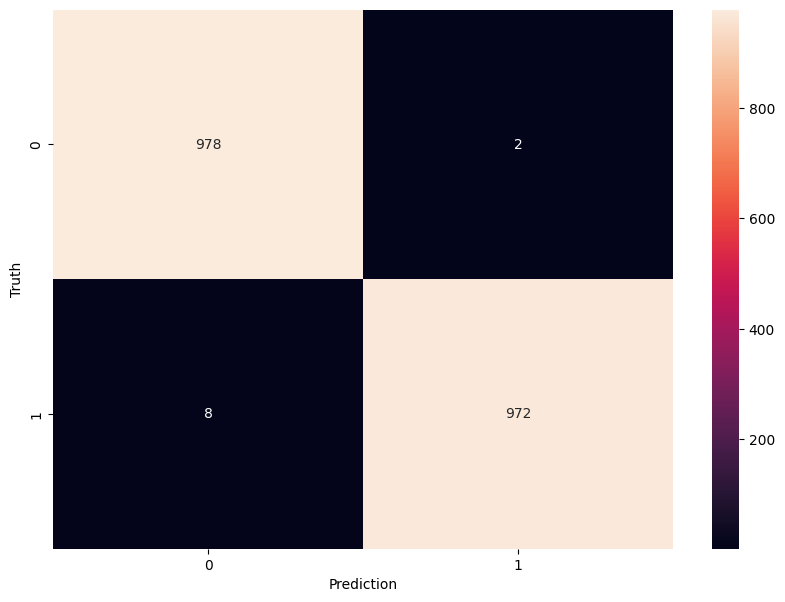

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')